In this notebook we will discuss:
    
1) Cross-validation

2) Using ExtraTreesClassifier for feature selection.

### Cross-validation

Is a process to validate a model. The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

One round of cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset (called the training set), and validating the analysis on the other subset (called the validation set or testing set). To reduce variability, in most methods multiple rounds of cross-validation are performed using different partitions, and the validation results are combined (e.g. averaged) over the rounds to give an estimate of the model's predictive performance.

References: https://en.wikipedia.org/wiki/Cross-validation_(statistics)#:~:text=Cross%2Dvalidation%2C%20sometimes%20called%20rotation,to%20an%20independent%20data%20set.

#### k-fold cross-validation

In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation. The advantage of this method over repeated random sub-sampling is that all observations are used for both training and validation, and each observation is used for validation exactly once. 

#### Explanation

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12

k = 4, we want to make 4 groups or partitions

In each group will have 3 values

G1 - 1, 2, 3

G2 - 4, 5, 6

G3 - 7, 8, 9

G4 - 10, 11, 12

First iteration: G1, G2, G3 for training and G4 to CV

Second iteration: G2, G3, G4 for training and G1 for CV

Third iteration: G1, G3, G4 for training and G2 for CV

Fourth iteration: G1, G2, G4 for training and G3 for CV

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Titanic.csv")

In [3]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
print(df.shape)

(891, 12)


In [5]:
df["family_size"] = df["SibSp"] + df["Parch"] + 1

In [6]:
print(df["Parch"].head())
print("+++++++++++++")
print(df["SibSp"].head())

0    0
1    0
2    0
3    0
4    0
Name: Parch, dtype: int64
+++++++++++++
0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64


In [7]:
print(df["family_size"].head())

0    2
1    2
2    1
3    2
4    1
Name: family_size, dtype: int64


In [8]:
print(df["Embarked"].unique())

['S' 'C' 'Q' nan]


In [9]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
family_size      0
dtype: int64


In [10]:
df["Age"].fillna(value=df["Age"].median(), inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
family_size      0
dtype: int64

In [11]:
df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [12]:
df["Embarked"].fillna(value="S", inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
family_size      0
dtype: int64

In [13]:
embarked = {"S":0, "C":1, "Q":2}

In [14]:
df.Embarked = [embarked[item] for item in df.Embarked] # list comprehension

In [15]:
gender = {"female":1, "male":0}

In [16]:
df.Gender = [gender[item] for item in df.Gender]

In [17]:
print(df.Gender[0:5])

0    0
1    1
2    1
3    1
4    0
Name: Gender, dtype: int64


In [18]:
dfx = df[["Age", "Gender", "family_size", "Embarked"]].copy(deep=True)
dfy = df[["Survived"]].copy(deep=True)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
x = scaler.fit_transform(dfx)

In [20]:
y = dfy

In [21]:
print(x.shape)
print(y.shape)

(891, 4)
(891, 1)


In [22]:
import numpy
x = numpy.array(x)
y = numpy.array(y)

In [23]:
print(x.shape, y.shape)

(891, 4) (891, 1)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

from sklearn.model_selection import RepeatedKFold
scores_test = []
model = LogisticRegression(solver='lbfgs', penalty='l2', random_state=1)
rkf = RepeatedKFold(n_splits=5, n_repeats=1, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(x):
    print("Train:", train_index, "Validation:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    #print(x_train.shape, x_test.shape)
    y_train, y_test = y[train_index], y[test_index]
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    
    #print(y_train.shape, y_test.shape)
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    scores_test.append(model.score(x_test, y_test))

Train: [  0   1   3   4   5   6   7   8   9  11  13  15  16  17  18  20  21  22
  23  25  26  27  30  32  35  36  37  40  41  42  43  44  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  66  68
  69  70  72  73  76  77  78  79  80  82  83  84  85  87  88  90  91  92
  93  95  96  97  98  99 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 122 124 125 126 127 128 129 130 131 132 133
 134 135 136 138 141 142 143 144 145 146 147 148 150 151 152 153 154 155
 156 157 158 159 160 162 163 164 165 167 168 169 170 171 172 175 176 177
 179 180 181 182 183 184 185 186 189 190 191 193 195 196 197 198 200 201
 203 206 207 208 209 210 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 233 234 235 236 237 238 239 240 241 243 244
 246 247 248 249 250 252 253 254 255 256 258 259 260 262 263 265 266 267
 268 269 270 271 272 273 275 276 277 278 281 282 283 284 285 286 287 288
 289 291 292 293 294 295 296 297 299 300 301

In [25]:
print(scores_test)

[0.7597765363128491, 0.7584269662921348, 0.8089887640449438, 0.8370786516853933, 0.8033707865168539]


In [26]:
scores_test = numpy.array(scores_test)
print(numpy.mean(scores_test))

0.793528340970435


[ 64 128 192 256 320 384 448 512 576 640]


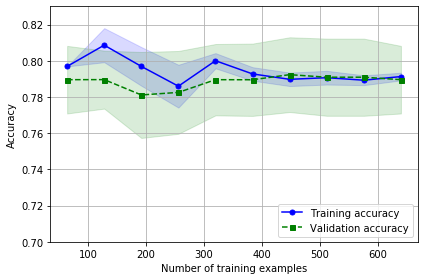

In [28]:
# We are using make_pipeline to define a pipeline that will use LogisticRegression with its attributes 
# on different data sizes. We start with 10% of the data then increase it at every step by 10% and stop when we
# consider all the data. 

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(LogisticRegression(penalty='l2', random_state=1,
                                           solver='lbfgs', max_iter=10000))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                               X=x_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1) 

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

print(train_sizes)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 0.83])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

### Extra Tree Classifier

Extra Trees is like Random Forest, in that it builds multiple trees and splits nodes using random subsets of features, but with two key differences: it does not bootstrap observations (meaning it samples without replacement), and nodes are split on random splits, not best splits. 

In [42]:
from sklearn.ensemble import ExtraTreesClassifier 

In [48]:
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, 
                                        criterion ='entropy', max_features = 2, random_state=2) 
  
# Training the model 
dfy = np.array(dfy).ravel()
extra_tree_forest.fit(dfx, dfy) 

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                     max_depth=None, max_features=2, max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                     oob_score=False, random_state=2, verbose=0,
                     warm_start=False)

In [52]:
# Computing the importance of each feature 
feature_importance = extra_tree_forest.feature_importances_ 

print(feature_importance)  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_], 
                                        axis = 0) 
# print(feature_importance_normalized)  # this might be optional

# "Age", "Gender", "family_size", "Embarked"

[0.4705246  0.33170388 0.15739352 0.040378  ]
[0.03111371 0.00480494 0.03389417 0.0072374 ]


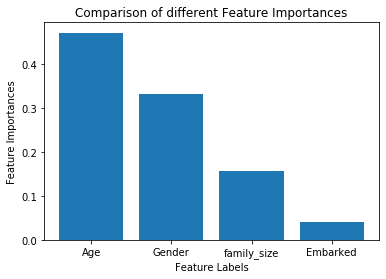

In [53]:
#plt.bar(dfx.columns, feature_importance_normalized) 
plt.bar(dfx.columns, feature_importance) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 

# Ramdom forest

5 features, rows are 1000
location (L), sq-ft (S), year built (Y), bed rooms (B), bathrooms (BA)

target price

features = S, Y, B, size=500
build a tree - 1

features = S, Y, BA, size=500
build a tree - 2